# Network Data Analysis - Coursework 2 - 7CUSMNDA

Author: Jack Humble  
Email: jack.humble@kcl.ac.uk  
Date: 25/03/2019  

This notebook contains the code which produces the results found in the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

from network_functions import *

In [2]:
# Read in nyc borough files
bronx = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/bronx_points.csv")
queens = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/queens_points.csv")
staten_island = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/staten_island_points.csv")
brooklyn = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/brooklyn_points.csv")
manhattan = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/manhattan_points.csv")

# Read in full nyc file
nyc = pd.read_csv("/Users/jackhumble/Documents/KingsCollege/Network_Analysis/Coursework2/data/dataset_TSMC2014_NYC.csv")

## Create Interaction Dataframes and Networkx Graphs

The following code creates the interaction dataframes and networkx graphs

### Bronx

In [3]:
# Create interaction dataframe
bronx_co = create_interaction_dataframe(bronx, "bronx_co_intdf", "colocation")

# Create networkx graph
bronx_co_G = nx.from_pandas_edgelist(bronx_co, source = 0, target = 1)

creating interaction dataframe...
-----
writing csv...
csv file created


In [4]:
# Create interaction dataframe
bronx_taste = create_interaction_dataframe(bronx, "bronx_taste_intdf", networkType = "taste")

# Create networkx graph
bronx_taste_G = nx.from_pandas_edgelist(bronx_taste, source = 0, target = 1)

creating interaction dataframe...
-----
writing csv...
csv file created


In [5]:
# remove stray node
bronx_co_G = list(nx.connected_component_subgraphs(bronx_co_G))[0]

### Queens

In [6]:
# Create interaction dataframe
queens_col = create_interaction_dataframe(queens, "queens_intdf", "colocation")

# Create networkx graph
queens_col_G = nx.from_pandas_edgelist(queens_col, source = 0, target = 1)

creating interaction dataframe...
--------
writing csv...
csv file created


In [7]:
# Create interaction dataframe
queens_taste = create_interaction_dataframe(queens, "queens_taste_intdf", networkType = "taste")

# Create networkx graph
queens_taste_G = nx.from_pandas_edgelist(queens_taste, source = 0, target = 1)

creating interaction dataframe...
--------
writing csv...
csv file created


### Brooklyn

In [8]:
# Create interaction dataframe
brooklyn_col = create_interaction_dataframe(brooklyn, "brooklyn_intdf", "colocation")

# Create networkx graph
brooklyn_col_G = nx.from_pandas_edgelist(brooklyn_col, source = 0, target = 1)

creating interaction dataframe...
--------
writing csv...
csv file created


In [9]:
# Create interaction dataframe
brooklyn_taste = create_interaction_dataframe(brooklyn, "brooklyn_taste_intdf", networkType = "taste")

# Create networkx graph
brooklyn_taste_G = nx.from_pandas_edgelist(brooklyn_taste, source = 0, target = 1)

creating interaction dataframe...
--------
writing csv...
csv file created


### Staten Island

In [10]:
# Create interaction dataframe
staten_island_col = create_interaction_dataframe(staten_island, "staten_island_intdf", "colocation")

# Create networkx graph
staten_island_col_G = nx.from_pandas_edgelist(staten_island_col, source = 0, target = 1)

creating interaction dataframe...
-
writing csv...
csv file created


In [11]:
# Create interaction dataframe
staten_island_taste = create_interaction_dataframe(staten_island, "staten_island_taste_intdf", networkType = "taste")

# Create networkx graph
staten_island_taste_G = nx.from_pandas_edgelist(staten_island_taste, source = 0, target = 1)

creating interaction dataframe...
-
writing csv...
csv file created


### Manhattan

In [12]:
# Create interaction dataframe
manhattan_col = create_interaction_dataframe(manhattan, "manhattan_intdf", "colocation")

# Create networkx graph
manhattan_col_G = nx.from_pandas_edgelist(manhattan_col, source = 0, target = 1)

creating interaction dataframe...
----------
writing csv...
csv file created


In [13]:
# Create interaction dataframe
manhattan_taste = create_interaction_dataframe(manhattan, "manhattan_taste_intdf", networkType = "taste")

# Create networkx graph
manhattan_taste_G = nx.from_pandas_edgelist(manhattan_taste, source = 0, target = 1)

creating interaction dataframe...
----------
writing csv...
csv file created


## Visualisation

/anaconda2/envs/spatial/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


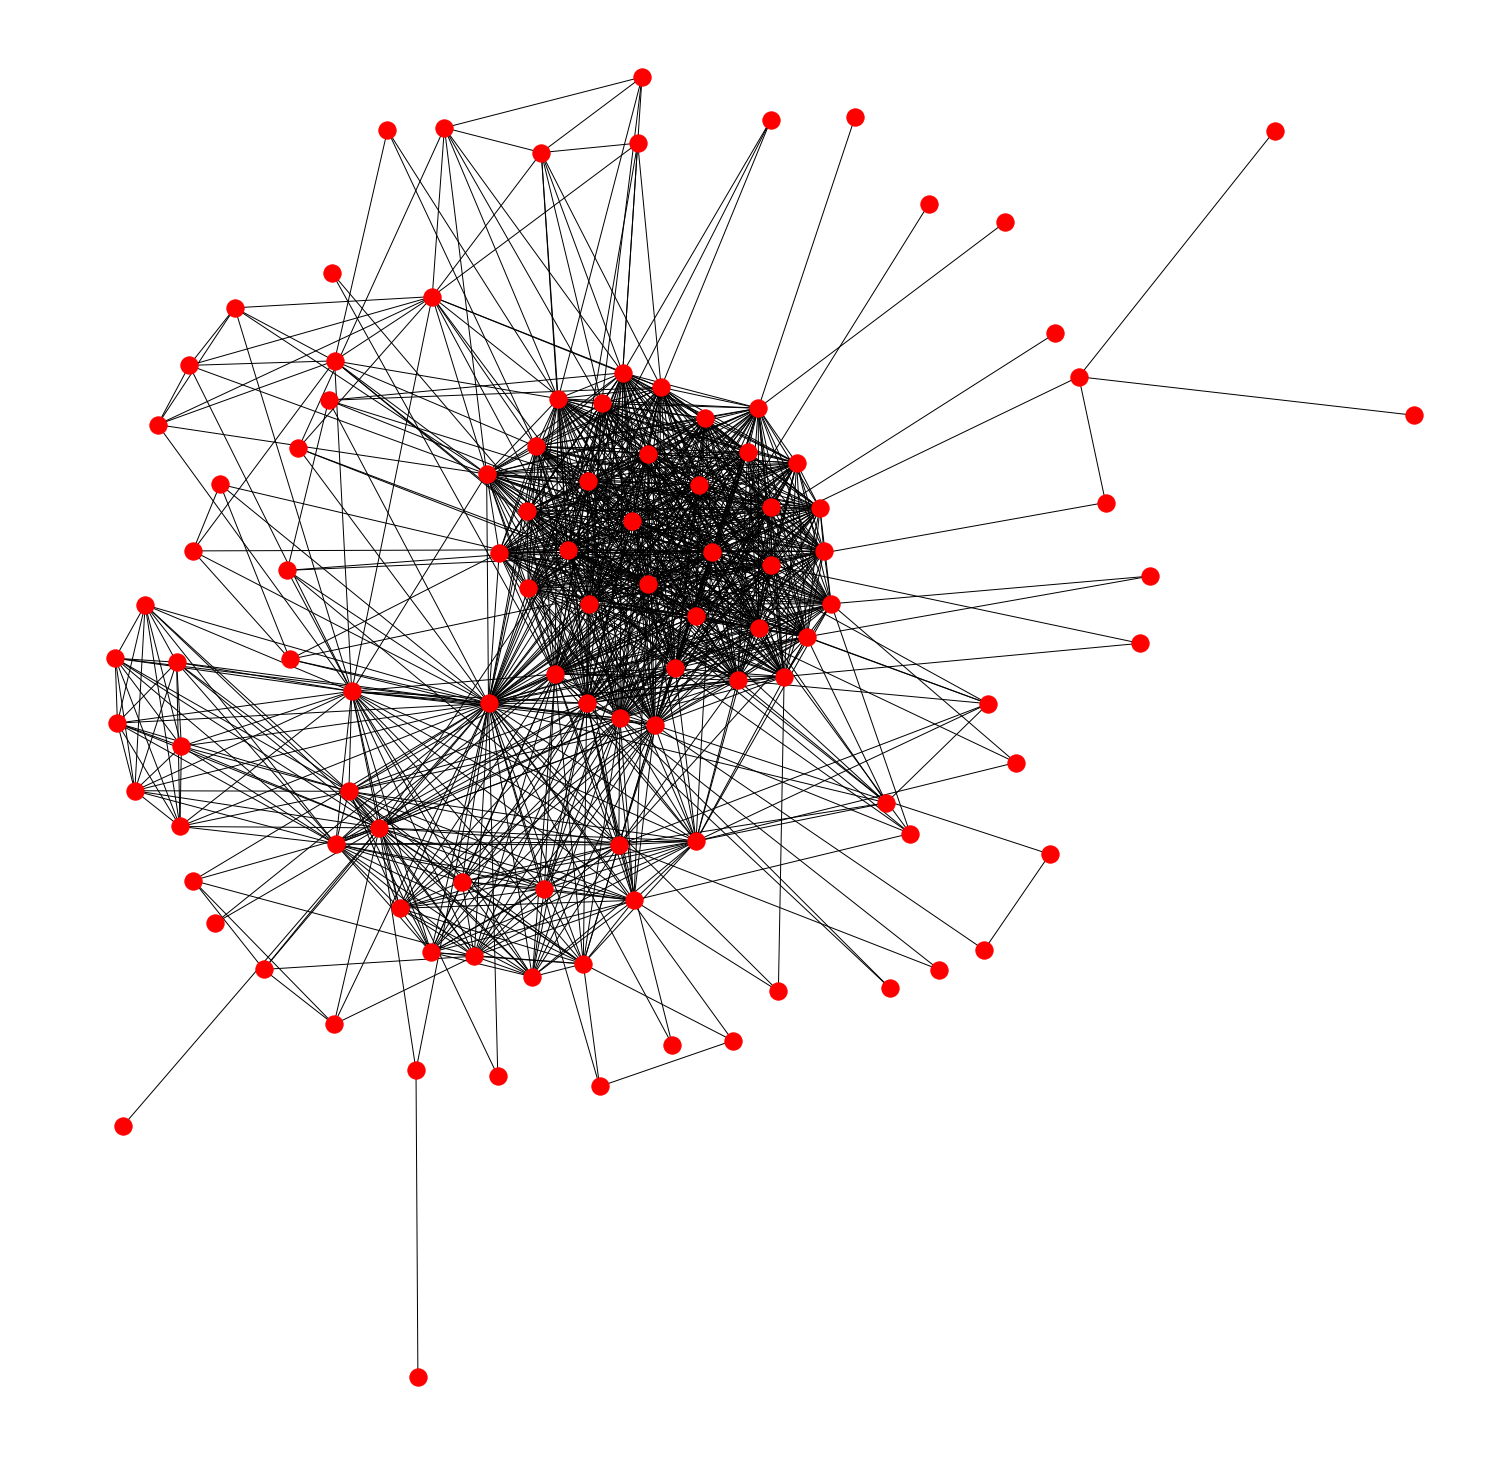

In [5]:
# Visualisation of Staten Island
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(staten_island_col_G)

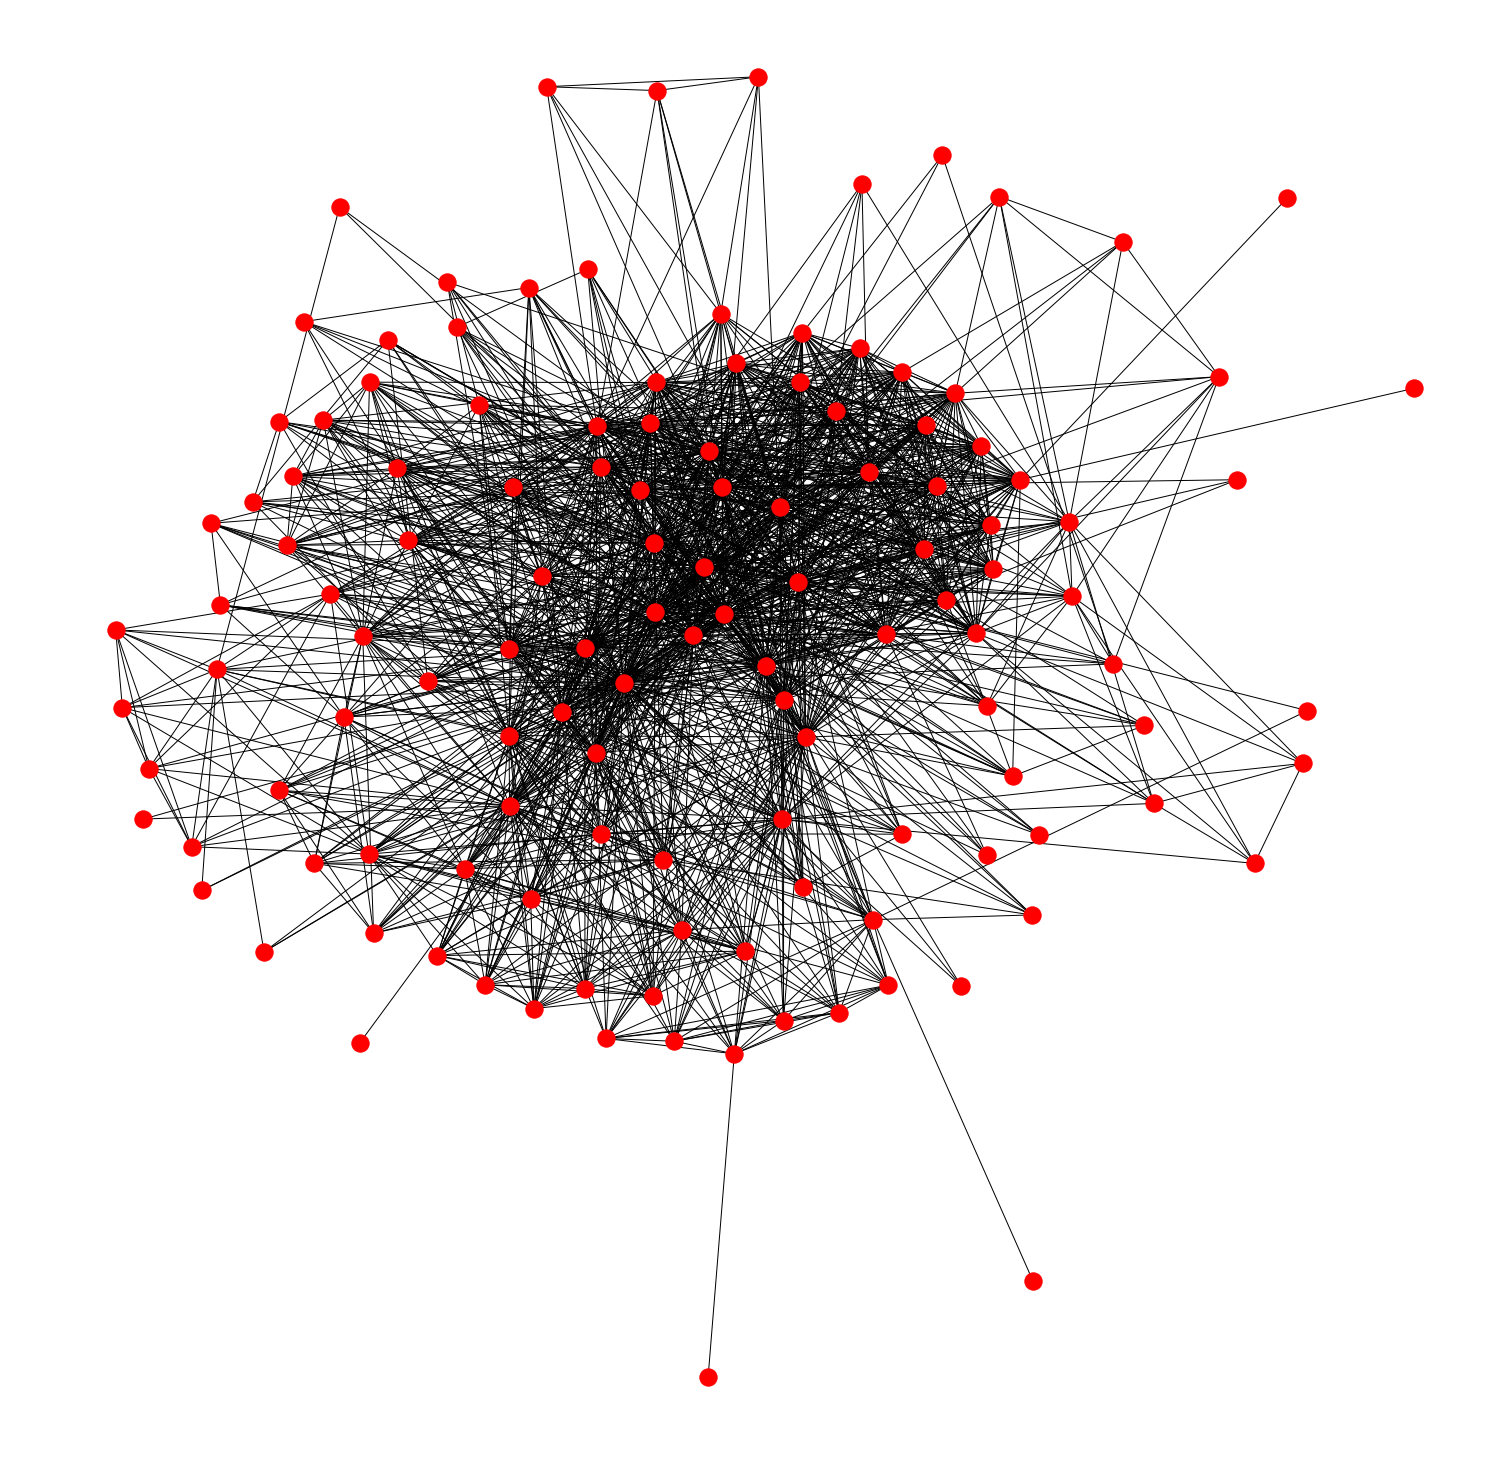

In [6]:
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(staten_island_taste_G)

In [48]:
nx.density(staten_island_col_G)

0.7771184407144068

## Create table of measures for each graph

The following code creates a table containing various metrics for all graphs:

In [92]:
def network_metrics(network):
    
    num_of_nodes = network.number_of_nodes()
    num_of_edges = network.number_of_edges()
    
    print("calculating clustering...")
    ave_clust = nx.average_clustering(network)
    print("calculating diameter...")
    diameter = nx.diameter(network)
    print("calculating density...")
    density = nx.density(network)
    print("calculating ave_short_path...")
    ave_shortest_path_length = nx.average_shortest_path_length(network)
    
    metrics = [num_of_nodes, num_of_edges, ave_clust, diameter, density, ave_shortest_path_length]
    
    return metrics
    

In [93]:
# Initialise list
metrics_list = []

print("Bronx")
metrics_list.append(network_metrics(bronx_co_G))
metrics_list.append(network_metrics(bronx_taste_G))

print("Queens")
metrics_list.append(network_metrics(queens_col_G))
metrics_list.append(network_metrics(queens_taste_G))

print("Brooklyn")
metrics_list.append(network_metrics(brooklyn_col_G))
metrics_list.append(network_metrics(brooklyn_taste_G))

print("Staten Island")
metrics_list.append(network_metrics(staten_island_col_G))
metrics_list.append(network_metrics(staten_island_taste_G))

print("Manhattan")
metrics_list.append(network_metrics(manhattan_col_G))
metrics_list.append(network_metrics(manhattan_taste_G))

Bronx
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
Queens
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
Brooklyn
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
Staten Island
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
Manhattan
calculating clustering...
calculating diameter...
calculating density...
calculating ave_short_path...
calculating clustering...
c

In [95]:
metrics = pd.DataFrame(metrics_list, columns = ["Nodes", "Edges", "Average.Clustering", "Diameter", "Density", "Averge.Shortest.Path.Length"])

In [97]:
metrics.to_csv("interaction_dataframes/network_metrics.csv")

## Muxviz file creation

The following code converts the data into a format that is readable by Muxviz:

In [104]:
# write out a space seperated file
staten_island_col.to_csv("MuxvizFiles/staten_col.csv", sep = " ", header = False, index = False)
staten_island_taste.to_csv("MuxvizFiles/staten_taste.csv", sep = " ", header = False, index = False)

# Create a file which allows muxviz to interpret the user ID column.
staten_island_labels = set(staten_island["userId"])
staten_island_layer = pd.DataFrame({"nodeID":list(range(1,len(staten_island_labels) + 1)), "node_label":list(staten_island_labels)})
staten_island_layer.to_csv("MuxvizFiles/staten_layer.csv", sep=" ", index=False)

In [15]:
# write out a space seperated file
bronx_co.to_csv("MuxvizFiles/bronx_col.csv", sep = " ", header = False, index = False)
bronx_taste.to_csv("MuxvizFiles/bronx_taste.csv", sep = " ", header = False, index = False)

# Create a file which allows muxviz to interpret the user ID column.
bronx_labels = set(bronx["userId"])
bronx_layer = pd.DataFrame({"nodeID":list(range(1,len(bronx_labels) + 1)), "node_label":list(bronx_labels)})
bronx_layer.to_csv("MuxvizFiles/bronx_layer.csv", sep=" ", index=False)

In [16]:
# write out a space seperated file
queens_col.to_csv("MuxvizFiles/queens_col.csv", sep = " ", header = False, index = False)
queens_taste.to_csv("MuxvizFiles/queens_taste.csv", sep = " ", header = False, index = False)

# Create a file which allows muxviz to interpret the user ID column.
queens_labels = set(queens["userId"])
queens_layer = pd.DataFrame({"nodeID":list(range(1,len(queens_labels) + 1)), "node_label":list(queens_labels)})
queens_layer.to_csv("MuxvizFiles/queens_layer.csv", sep=" ", index=False)

In [17]:
# write out a space seperated file
brooklyn_col.to_csv("MuxvizFiles/brooklyn_col.csv", sep = " ", header = False, index = False)
brooklyn_taste.to_csv("MuxvizFiles/brooklyn_taste.csv", sep = " ", header = False, index = False)

# Create a file which allows muxviz to interpret the user ID column.
brooklyn_labels = set(brooklyn["userId"])
brooklyn_layer = pd.DataFrame({"nodeID":list(range(1,len(brooklyn_labels) + 1)), "node_label":list(brooklyn_labels)})
brooklyn_layer.to_csv("MuxvizFiles/brooklyn_layer.csv", sep=" ", index=False)

In [18]:
# write out a space seperated file
manhattan_col.to_csv("MuxvizFiles/manhattan_col.csv", sep = " ", header = False, index = False)
manhattan_taste.to_csv("MuxvizFiles/manhattan_taste.csv", sep = " ", header = False, index = False)

# Create a file which allows muxviz to interpret the user ID column.
manhattan_labels = set(manhattan["userId"])
manhattan_layer = pd.DataFrame({"nodeID":list(range(1,len(manhattan_labels) + 1)), "node_label":list(manhattan_labels)})
manhattan_layer.to_csv("MuxvizFiles/manhattan_layer.csv", sep=" ", index=False)

## Recommender System

The following code demonstrates the usage of the simple recommender system:

The resulting dataframe contains percentage taste network overlap. Obviously the highest overlap is with itself at 100%.

In [27]:
most_similar_node(349).head()

,user,number_overlap,percentage_overlap
0,349,1369,100.00
1,84,1143,83.49
2,384,1098,80.20
3,99,1022,74.65
4,19,995,72.68


In [4]:
# UserId 1
most_similar_node(1).head()

,user,number_overlap,percentage_overlap
0,1,106,100.00
1,349,100,94.34
2,372,97,91.51
3,84,91,85.85
4,384,90,84.91


In [10]:
# UserId 100
most_similar_node(100).head()

,user,number_overlap,percentage_overlap
0,100,257,100.00
1,193,192,74.71
2,665,187,72.76
3,726,185,71.98
4,246,182,70.82


In [18]:
# UserId 271
most_similar_node(271).head()

,user,number_overlap,percentage_overlap
0,271,172,100.00
1,193,147,85.47
2,736,134,77.91
3,582,134,77.91
4,106,131,76.16


In [19]:
# UserId 432
most_similar_node(432).head()

,user,number_overlap,percentage_overlap
0,432,411,100.00
1,459,323,78.59
2,834,319,77.62
3,952,314,76.40
4,74,310,75.43


In [21]:
# UserId 1010
most_similar_node(1010).head()

,user,number_overlap,percentage_overlap
0,1010,135,100.00
1,768,126,93.33
2,349,125,92.59
3,267,113,83.70
4,546,113,83.70


In [22]:
# Recommendations for UserId 1
venue_recommendation(1)

['4bf58dd8d48988d163941735',
 '4bf58dd8d48988d1ca941735',
 '4bf58dd8d48988d163941735',
 '4eb1c1623b7b52c0e1adc2ec',
 '4bf58dd8d48988d164941735']

In [23]:
# Recommendations for UserId 1
venue_recommendation(100)

['4bf58dd8d48988d1ed931735',
 '4bf58dd8d48988d1a2941735',
 '4bf58dd8d48988d175941735',
 '4bf58dd8d48988d1a2941735',
 '4bf58dd8d48988d1ec931735']

In [24]:
# Recommendations for UserId 1
venue_recommendation(271)

['4bf58dd8d48988d1ed931735',
 '4bf58dd8d48988d1a2941735',
 '4bf58dd8d48988d175941735',
 '4bf58dd8d48988d1a2941735',
 '4bf58dd8d48988d1ec931735']

In [25]:
# Recommendations for UserId 1
venue_recommendation(432)

['4bf58dd8d48988d16c941735',
 '4bf58dd8d48988d14e941735',
 '4bf58dd8d48988d103941735',
 '4bf58dd8d48988d1ca941735',
 '4bf58dd8d48988d103941735']

In [26]:
# Recommendations for UserId 1
venue_recommendation(1010)

['4d954b06a243a5684965b473',
 '4bf58dd8d48988d12b951735',
 '4bf58dd8d48988d118951735',
 '4bf58dd8d48988d175941735',
 '4bf58dd8d48988d175941735']